# Problem Statement 

A retail corporation seeks insights into customer purchasing patterns, particularly focusing on purchase amounts across different product categories. They've provided a summary of customer purchases for high-volume products selected from the previous month. This dataset encompasses customer demographics (age, gender, marital status, city type, length of stay in current city), product specifics (product ID and category), and total purchase amounts from the prior month.
Now, they want to analyze purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

# Import libraries and Loading data 

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as py
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv(r"E:\c drive\Desktop\CloudyML\New CloudyML\Python\Python Case Studies\blackfriday.csv")

In [5]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
data.shape

(550068, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
data.count()

User_ID                       550068
Product_ID                    550068
Gender                        550068
Age                           550068
Occupation                    550068
City_Category                 550068
Stay_In_Current_City_Years    550068
Marital_Status                550068
Product_Category_1            550068
Product_Category_2            376430
Product_Category_3            166821
Purchase                      550068
dtype: int64

# Check null values percentage 

In [19]:
data.isna().sum()/data.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

### There are almost 31% and 69% null values in Product_Category_2 and Product_Category_3 respectively.

# Check Unique elements in each attributes 

In [22]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

# EDA :

## Purchase Variable

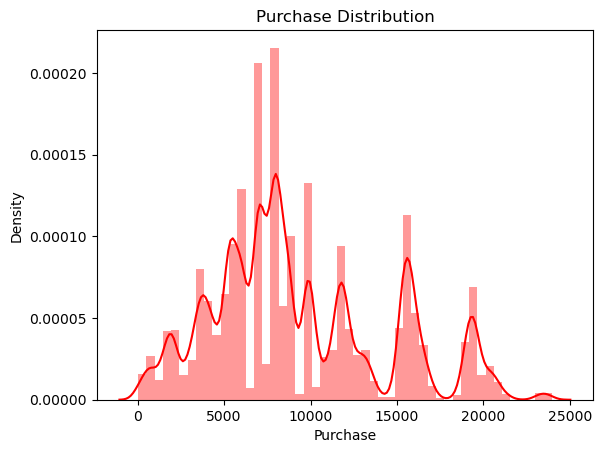

In [44]:
sns.distplot(data["Purchase"] , color = "red")
py.title("Purchase Distribution")
py.show()

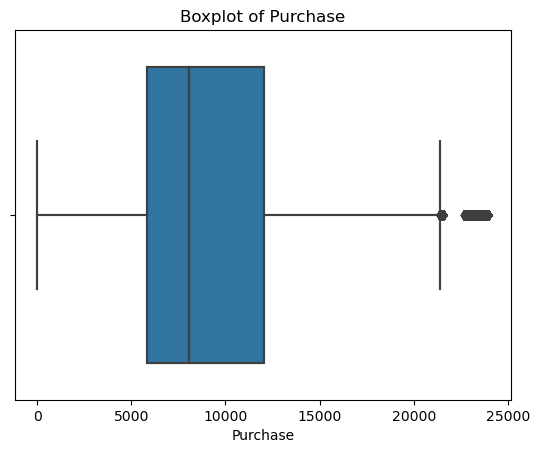

In [46]:
sns.boxplot(data["Purchase"])
py.title("Boxplot of Purchase")
py.show()

In [47]:
data["Purchase"].skew()

0.6001400037087128

In [48]:
data["Purchase"].describe()

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

## Gender 

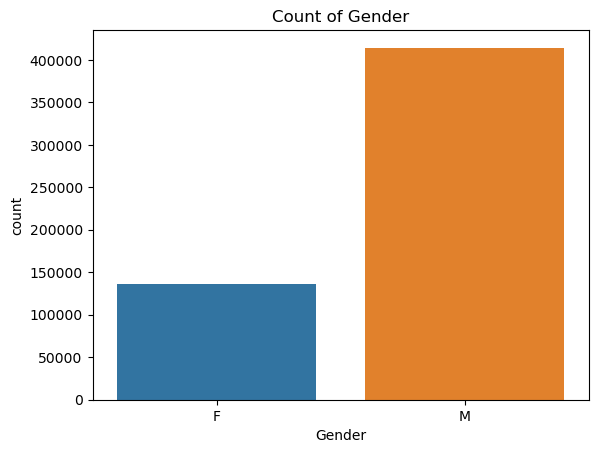

In [51]:
sns.countplot(data["Gender"])
py.title("Count of Gender")
py.show()

In [52]:
data["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [56]:
round(data["Gender"].value_counts(normalize = True)*100 , 2) 

M    75.31
F    24.69
Name: Gender, dtype: float64

In [58]:
data.groupby("Gender")["Purchase"].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

#### Male spends more money than female

# Marital Status 

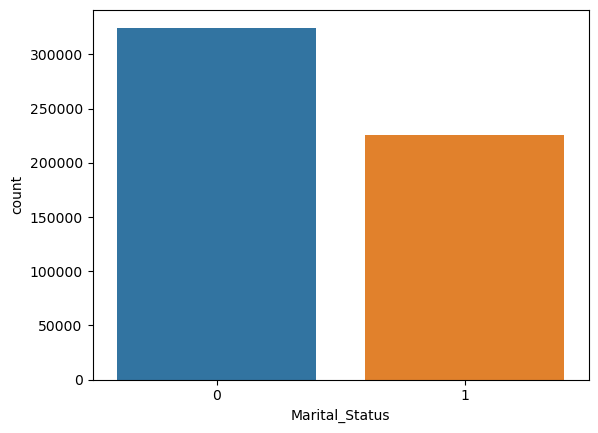

In [61]:
sns.countplot(data["Marital_Status"])
py.show()

In [63]:
data.groupby("Marital_Status")["Purchase"].mean()

Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

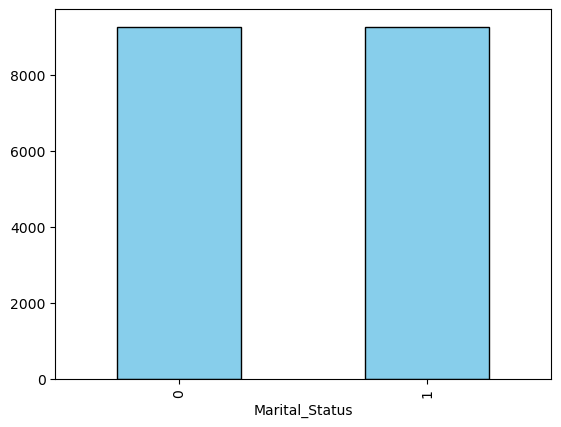

In [71]:
data.groupby("Marital_Status")["Purchase"].mean().plot(kind = "bar" , color="skyblue",edgecolor="black")
py.show()

# Occupation 

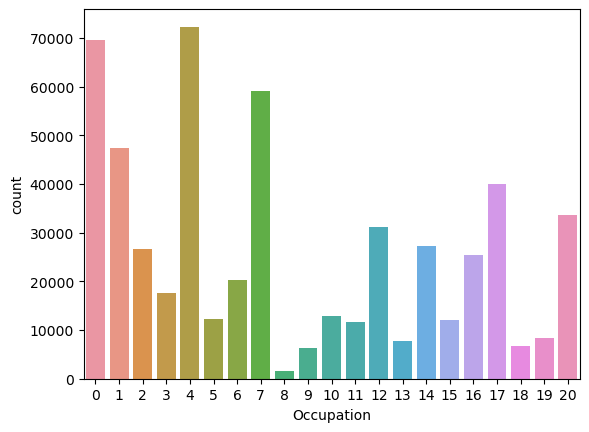

In [72]:
sns.countplot(data["Occupation"])
py.show()

Occupation has 20 different values. We don't know each occupation number. So,it is difficult to make analysis.

In [75]:
data.groupby("Occupation")["Purchase"].mean().sort_values(ascending=False)

Occupation
17    9821.478236
12    9796.640239
15    9778.891163
8     9532.592497
14    9500.702772
7     9425.728223
16    9394.464349
5     9333.149298
13    9306.351061
6     9256.535691
4     9213.980251
11    9213.845848
3     9178.593088
18    9169.655844
0     9124.428588
10    8959.355375
1     8953.193270
2     8952.481683
20    8836.494905
19    8710.627231
9     8637.743761
Name: Purchase, dtype: float64

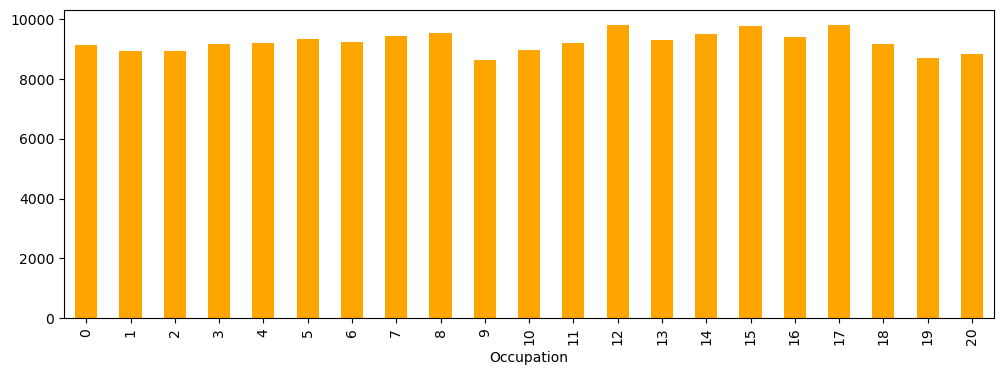

In [81]:
data.groupby("Occupation")["Purchase"].mean().plot(kind= "bar",figsize=(12,4) , color="orange")
py.show()

 The amount spends on average is more or less same for all occupation

# City_Category 